#Offensive Tackles in Football

So I have a brother who is currently 16 and plays high school football as an offensive tackle. He is 6 feet 2 inches and weights 250 pounds. Now that is a big kid. His dream is to play professional football one day.

The first step to playing professional football is to play college football for hopefully a good team. Not knowing much about what it takes to get recruited by a top college football team, I thought I would look for some data. Fortunately, ESPN has height and weight data on the [top 100 offensive tackles](http://espn.go.com/college-sports/football/recruiting/playerrankings/_/position/offensive-tackle/class/2015/view/position) being recruited out of high school. This little project will look at the height and weight of top recruited offensive tackles and how these values are associated with that player's rank.

#Get and Clean the Data

In [1]:
from bs4 import BeautifulSoup
import urllib2
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='ticks', palette='Set2')
import statsmodels.api as sm

Lets get the data from ESPN.

In [2]:
html = urllib2.urlopen('http://espn.go.com/college-sports/football/recruiting/playerrankings/_/view/position/order/true/position/offensive-guard')
text = html.read()
soup = BeautifulSoup(text.replace('ISO-8859-1', 'utf-8'))

In [3]:
ht_wgt = []
for tr in soup.findAll('tr')[1:]:
    tds = tr.findAll('td')
    height = tds[4].text
    weight = tds[5].text
    grade = tds[7].text
    ht_wgt.append([height, weight, grade])

A quick sanity check to make sure we got 100 players

In [4]:
#should have 100
len(ht_wgt)

100

Now lets drop our data into a Pandas data frame and take a look.

In [5]:
data = DataFrame(ht_wgt, columns=['height', 'weight', 'grade'])
data.head()

,height,weight,grade
0,6'5'',330,87
1,6'5'',280,85
2,6'3'',340,84
3,6'3'',312,84
4,6'5'',315,83


Lets clean up the data to get the values as integers and convert the height to inches. I also created a mean zero grade just to bring the grades closer to zero.

In [6]:
data['weight'] = data.weight.astype(int)
data['grade'] = data.grade.astype(int)
hgt_str = data.height.values
hgt_str = [x.split("'") for x in hgt_str]
hgt_in = [(int(x[0]) * 12) + int(x[1]) for x in hgt_str]
data['height_inches'] = hgt_in
data['grade_meanzero'] = data.grade - data.grade.mean()
data.head()

,height,weight,grade,height_inches,grade_meanzero
0,6'5'',330,87,77,10.48
1,6'5'',280,85,77,8.48
2,6'3'',340,84,75,7.48
3,6'3'',312,84,75,7.48
4,6'5'',315,83,77,6.48


#Make Some Plots

Lets take a look at the distribution of height and weight and how that fits in with the ranking. Also, I will plot my brother on the plots to see how he stacks up.

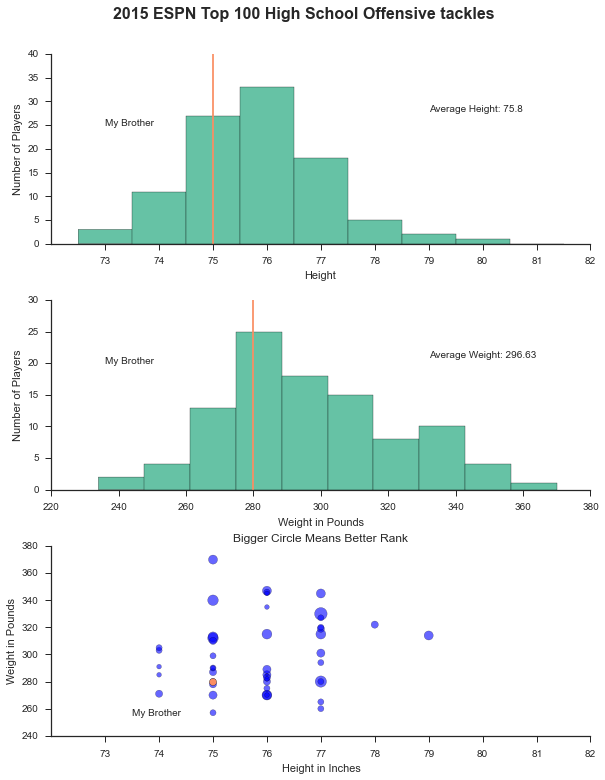

In [9]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(8.5, 11)

fig.suptitle('2015 ESPN Top 100 High School Offensive tackles',
             fontsize=16, fontweight='bold')

ax[0].hist(data.height_inches, bins = range(73,83), align='left')
ax[0].set_xlabel('Height')
ax[0].set_ylabel('Number of Players')
ax[0].annotate('Average Height: {}'.format(data.height_inches.mean()), 
             xy=(.5, .5), xytext=(.70, .7),  
             xycoords='axes fraction', textcoords='axes fraction')
ax[0].plot([75, 75], [0,40])
ax[0].set_xlim([72,82])
ax[0].set_xticks(range(73,83))
ax[0].annotate('My Brother', xy=(75, 20), xytext=(73, 25))

ax[1].hist(data.weight)
ax[1].set_xlabel('Weight in Pounds')
ax[1].set_ylabel('Number of Players')
ax[1].annotate('Average Weight: {}'.format(data.weight.mean()), 
             xy=(.5, .5), xytext=(.70, .7),  
             xycoords='axes fraction', textcoords='axes fraction')
ax[1].plot([280, 280], [0,30])
ax[1].annotate('My Brother', xy=(250, 15), xytext=(236, 20))

ax[2].scatter(data.height_inches, data.weight, s=data.grade_meanzero*15, alpha=.6)
ax[2].set_title('Bigger Circle Means Better Rank')
ax[2].set_xlabel('Height in Inches')
ax[2].set_ylabel('Weight in Pounds')
ax[2].set_xlim([72,82])
ax[2].set_xticks(range(73,83))
ax[2].scatter([75],[280], alpha=1, s=50, c=sns.color_palette("Set2", 2)[1])
ax[2].annotate('My Brother', xy=(75, 280), xytext=(73.5, 255))

fig.tight_layout()
plt.subplots_adjust(top=0.92)
sns.despine()
plt.savefig('Top100_OT.png')

#Analysis

It looks like the sweet spot for height is between 76 and 78 inches. And it looks like taller players are getting a better rank; at least up to 78 inches. This makes some sense because you probably don't expect your players to grow much taller; you can more easily affect their weight gain if needed.

This is a very simple and somewhat silly example of data analysis, but I like it. Using data I was able to gain a better understanding of an area in which I previously had no experience. Also, I was able to give my brother some sound advice that is grounded in data - grow taller!